In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.__version__

'2.4.1'

In [2]:
"""
This blog will show you how to create your 1st deep learning nwural netweok model in Python using Keras.



Deep neural networks lab
Working with Boston breast cancer dataset
dataset contains measurements about tumors
It is a binary classification problem (malignancy as 1 or benign as 0).
build model that's going to predict if tumors if malignant or benign
"""
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [3]:
data = load_breast_cancer()
data_df = data.data
target = data.target
cols = data.feature_names

In [4]:
df = pd.DataFrame(data=data_df, columns=cols)
#df['taget'] = target

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
target[:5]

array([0, 0, 0, 0, 0])

In [7]:
type(target)

numpy.ndarray

In [8]:
"""
Preprocess data
Before passng data into neural netwoek needs to make sure that data is purely numerical, contains no missing values, 
    and is normalized
Neural networks expect numerical input values    
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [10]:
"""
mean radiius and mean area columns are of a different scale
This means we need to normalize our data.
We're going to use skleanr's StandardScaler library
There are columns where max values are already below 1 so they've already been scaled.
But mean perimeter and mean area have not
Want to get all values to as close to teh same scale as possible
"""

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df_data = df.copy()

In [12]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = df_data.values
y = target

In [14]:
import seaborn as sns

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


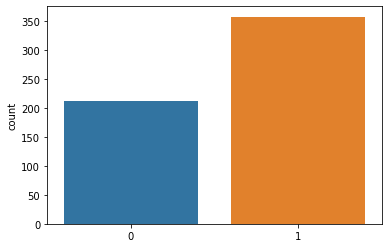

In [15]:

sns.countplot(y)

In [16]:
y_df= pd.Series(y)
y_df.value_counts(normalize=True)

1    0.627417
0    0.372583
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
"""
want to do train test split that way we only fit to training set to prevent data leakage from the test set
"""

'\nwant to do train test split that way we only fit to training set to prevent data leakage from the test set\n'

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#we don't fit to test set b/c we don't want to assume prior information about test set
scaler_min = MinMaxScaler()
X_train_scaler = scaler_min.fit_transform(X_train)
X_test_scaler = scaler_min.transform(X_test)

In [22]:
X_train_scaler.shape

(381, 30)

In [23]:
"""
final layer. going to have 1 neuron. going to be outputing out prediciton. It's going to ouput prediction
for binary classificaiton we want last activation to be sigmoid
outputting sometihng between 0 and 1
"""
model_a = Sequential()
model_a.add(Dense(30, activation='relu',input_shape=(30,)))
model_a.add(Dense(15, activation='relu',input_shape=(30,)))

model_a.add(Dense(1, activation='sigmoid',input_shape=(30,)))

model_a.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['acc'])

model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [24]:
"""
going to pass x_train_scaled data
also pass in validation data-after epoch of training on training data it will run test data nd check our loss on test data
    so w cna keep track of how well it's doing on train data and test data
this in plot will show if we're overfitting    
"""
results_a = model_a.fit(x=X_train_scaler, y=y_train, validation_data=(X_test_scaler, y_test), epochs=25, batch_size=5, validation_split=0.2)

Epoch 1/25
61/61 [==============================] - 2s 21ms/step - loss: 0.6931 - acc: 0.6022 - val_loss: 0.6627 - val_acc: 0.6494
Epoch 2/25
61/61 [==============================] - 0s 3ms/step - loss: 0.6783 - acc: 0.6012 - val_loss: 0.6439 - val_acc: 0.6623
Epoch 3/25
61/61 [==============================] - 0s 3ms/step - loss: 0.6451 - acc: 0.6449 - val_loss: 0.6261 - val_acc: 0.6883
Epoch 4/25
61/61 [==============================] - 0s 3ms/step - loss: 0.6363 - acc: 0.6540 - val_loss: 0.6061 - val_acc: 0.7403
Epoch 5/25
61/61 [==============================] - 0s 3ms/step - loss: 0.6129 - acc: 0.7148 - val_loss: 0.5849 - val_acc: 0.8182
Epoch 6/25
61/61 [==============================] - 0s 4ms/step - loss: 0.5879 - acc: 0.7866 - val_loss: 0.5594 - val_acc: 0.8312
Epoch 7/25
61/61 [==============================] - 0s 5ms/step - loss: 0.5652 - acc: 0.8074 - val_loss: 0.5330 - val_acc: 0.8701
Epoch 8/25
61/61 [==============================] - 0s 6ms/step - loss: 0.5287 - acc: 0.8

In [25]:
"""
plot training and validation loss
history of loss
loss=training loss
key charactersitci of overfitting-in hte beggining afte ra few epochs both trainining and validaiton are decreasing
    Decreasging loss in both train and validation. However over time train loss in blue is still going down.
    However, validaiton loss begins to increase. Telss us were overftting to training data set
"""
def plot_training_result(results_a):
    history = results_a.history
    plt.figure()
    
    plt.plot(history['loss']) 
    plt.plot(history['val_loss'])
    plt.legend(['loss', 'val_loss'])  
    plt.title('Loss')
    plt.xlabel('Epochs')         
    plt.ylabel('Loss')

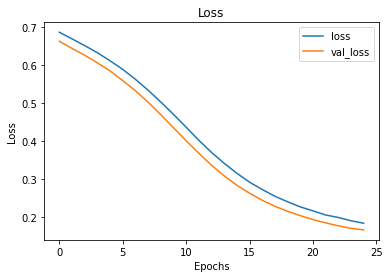

In [26]:
"""
get loss omn my training set but also 
val_loss-but also loss on test set. that validation data
compare loss on training vs loss on 
inorder to see if I'm overfitting to the training data on my model
compare plot behavior to blue training loss vs. my ornage validation loss
We want it whre there's a drecase in training loss and validaiton loss
    there is no increae so far in validaiton set and validaiton is going dow nso we could continue training w/o
    overfitting to our training data
    If we saw orange line began to spike go up and up that merans we're overfitting to training data b/c 
    you ahve much larger loss on validation data.
    you want to see traing loss and validation loss go down and contune together. Here there's no overfitting
"""

plot_training_result(results_a)

In [27]:
#shows class it predicts for 
#predciting a class of benign or malignant
#predictions = model_a.predict_classes(x_test_scaler)
#predictions = np.argmax(model_a.predict(X_test_scaler), axis=1)
predictions = model_a.predict(X_test_scaler).round()
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

In [28]:
#evlaute test data
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#compare y_true and predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.93      0.96      0.94       121

    accuracy                           0.93       188
   macro avg       0.92      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



In [30]:
#our model misclassified 9 points in our test set
print(confusion_matrix(y_test,predictions))

[[ 58   9]
 [  5 116]]


In [31]:
"""
instantiate teh 
"""
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [32]:
"""
our means are centered around 0 and the maxes are around 3 or 4. 
"""
scaled_df.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,...,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


#### Binarizing Labels

In [33]:
"""
Need dat aforamtted this way, otherwise get an error.  each entry is now an array.
"""
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(target)
labels[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [34]:
type(labels)

numpy.ndarray

#### Build Neural Network

In [35]:
"""
Build Multi-Layer Perceptron
instantiate Sequential Keras model
Models are defined as sequence of layers.  How do we know the number of layers to use and their types?
    One approch i dd layers one at a time until we are happy with our network architecture.
use .add() method to add a Dense layer w/10 neurons and 'tanh' activation function.
Set the input_shape attribute to 30 since we have 30 features
The first layer is a hidden layer w/10 neurons and uses the tanh activaiton function.

Since this is a binary classification task, the output layer should be a Dense layer with a single neuron
and the activaiton set to 'sigmoid'
we can preview model. summary of layers we have
"""
model_1 = Sequential()
model_1.add(Dense(10, activation='tanh',input_shape=(30,)))
model_1.add(Dense(1, activation='sigmoid',input_shape=(30,)))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [36]:
"""
compiling the model. Compile is hwere we tell it a number of important things
It prints out he loss function being used, 
    whcih type of gradient descent to use in htis cas ewe're using stochasitc. Which is 1 of 3 most popular
    and which metric we want it to track when it's training

Another popular version of gradient descent is 'adam' because it automatically tunes itself and gives good results in a wide range of problems.    
"""
model_1.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['acc'])

In [37]:
"""
fitting our model
set hte following parameters

epochs=25-how man ytime do we go thorugh all the data until it is finished running
batch_size = 1 datapoint before it updates.One or more samples considered by the model within an epoch before weights are updated.
     set the number of dataset rows that are considered before the model weights are updated within each epoch, 

validation_split=0.2 - the way in whcih we can get around hacing to make 3 datasets for a neural netwrok. Instead of having to
    make our own validaiton data its goingto take some of our training data and set it aside and then at hte end of each
    epoch, it'll test how it's doing with set aside and autocamitally handle getting validaiton dat for us
"""
results_1 = model_1.fit(scaled_df, labels, epochs=25, batch_size=5, validation_split=0.2)

Epoch 1/25
91/91 [==============================] - 1s 4ms/step - loss: 0.6595 - acc: 0.5294 - val_loss: 0.3073 - val_acc: 0.9561
Epoch 2/25
91/91 [==============================] - 0s 3ms/step - loss: 0.2661 - acc: 0.9464 - val_loss: 0.2158 - val_acc: 0.9561
Epoch 3/25
91/91 [==============================] - 0s 2ms/step - loss: 0.2083 - acc: 0.9394 - val_loss: 0.1756 - val_acc: 0.9649
Epoch 4/25
91/91 [==============================] - 0s 2ms/step - loss: 0.1731 - acc: 0.9583 - val_loss: 0.1521 - val_acc: 0.9737
Epoch 5/25
91/91 [==============================] - 0s 2ms/step - loss: 0.1322 - acc: 0.9642 - val_loss: 0.1365 - val_acc: 0.9737
Epoch 6/25
91/91 [==============================] - 0s 3ms/step - loss: 0.1293 - acc: 0.9715 - val_loss: 0.1257 - val_acc: 0.9649
Epoch 7/25
91/91 [==============================] - 0s 2ms/step - loss: 0.1078 - acc: 0.9827 - val_loss: 0.1178 - val_acc: 0.9737
Epoch 8/25
91/91 [==============================] - 0s 2ms/step - loss: 0.1119 - acc: 0.96

In [38]:
def plot_training_result(results_1):
    history = results_1.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss']) 
    plt.legend(['val_loss', 'loss'])  
    plt.title('Loss')
    plt.xlabel('Epochs')         
    plt.ylabel('Loss')
             
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc']) 
    plt.legend(['val_acc', 'acc'])  
    plt.title('Accuracy')
    plt.xlabel('Epochs')         
    plt.ylabel('Accuracy')         

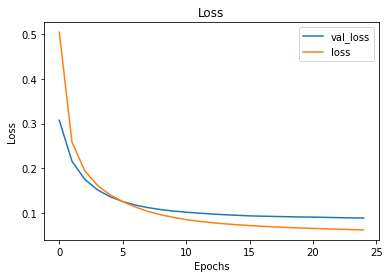

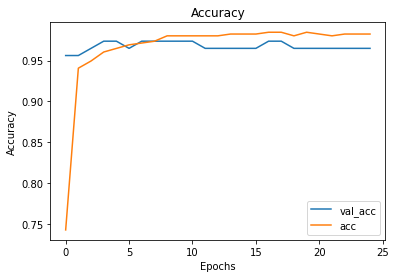

In [39]:
"""
orange-training score
validation scores - from training data set aside are in blue
model is overfitting b/c they are plateauing
    The loss got less and less for training data. It plateaued lng ago for validation data.
    it never got better with valiation data even thoug it kept learning and learning
gradient seems to be having trouble conveging. It's bouncing around
It's overfit and doesn't look like it's converging

"""
plot_training_result(results_1)

In [40]:
"""
add another hidden layer
take same archtecture
add a sencond Dense layer w/tanh activation funciton and 5 neurons after the first
adding a layer between our hidden laye and output layer
"""
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh',input_shape=(30,)))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['acc'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [41]:
results_2 = model_2.fit(scaled_df, labels, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 1s 2ms/step - loss: 0.4076 - acc: 0.8206 - val_loss: 0.1398 - val_acc: 0.9737
Epoch 2/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1081 - acc: 0.9641 - val_loss: 0.1042 - val_acc: 0.9737
Epoch 3/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0832 - acc: 0.9855 - val_loss: 0.0901 - val_acc: 0.9649
Epoch 4/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0718 - acc: 0.9851 - val_loss: 0.0835 - val_acc: 0.9649
Epoch 5/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0710 - acc: 0.9812 - val_loss: 0.0760 - val_acc: 0.9737
Epoch 6/25
455/455 [==============================] - 1s 3ms/step - loss: 0.0482 - acc: 0.9895 - val_loss: 0.0916 - val_acc: 0.9649
Epoch 7/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0418 - acc: 0.9913 - val_loss: 0.0913 - val_acc: 0.9649
Epoch 8/25
455/455 [==============================] - 1s 2ms/step - loss: 0.

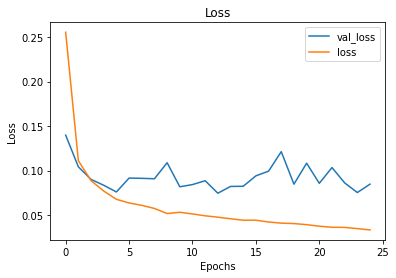

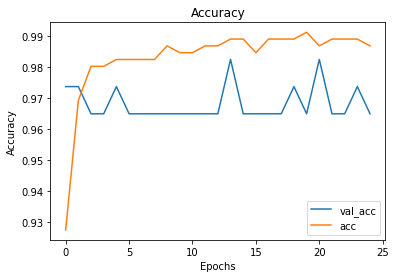

In [42]:
"""


"""
plot_training_result(results_2)

In [43]:
model_3 = Sequential()
model_3.add(Dense(10, activation='tanh',input_shape=(30,)))
model_3.add(Dense(5, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['acc'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [44]:
results_3 = model_3.fit(df, labels, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 2s 3ms/step - loss: 0.7386 - acc: 0.5545 - val_loss: 0.6214 - val_acc: 0.7719
Epoch 2/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6907 - acc: 0.5568 - val_loss: 0.5890 - val_acc: 0.7719
Epoch 3/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6648 - acc: 0.6177 - val_loss: 0.6129 - val_acc: 0.7719
Epoch 4/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6875 - acc: 0.5791 - val_loss: 0.6107 - val_acc: 0.7719
Epoch 5/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6856 - acc: 0.5839 - val_loss: 0.5950 - val_acc: 0.7719
Epoch 6/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6890 - acc: 0.5759 - val_loss: 0.6187 - val_acc: 0.7719
Epoch 7/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6870 - acc: 0.5761 - val_loss: 0.5937 - val_acc: 0.7719
Epoch 8/25
455/455 [==============================] - 1s 2ms/step - loss: 0.

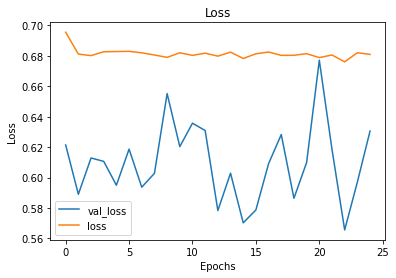

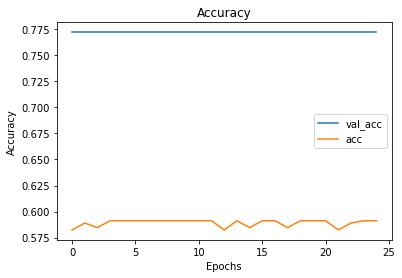

In [45]:
"""
we fed in raw data which had different ranges
validation just bounced all over hte place
loss never improved
accuracy never got better
"""
plot_training_result(results_3)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler_m = MinMaxScaler() 
scaled_df_m = pd.DataFrame(scaler_m.fit_transform(df), columns=df.columns)
scaled_df_m

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [48]:
scaled_df_m.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
model_4 = Sequential()
model_4.add(Dense(10, activation='tanh',input_shape=(30,)))
model_4.add(Dense(5, activation='tanh'))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['acc'])
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [50]:
results_4 = model_4.fit(scaled_df_m, labels, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
455/455 [==============================] - 1s 2ms/step - loss: 0.6087 - acc: 0.6821 - val_loss: 0.3754 - val_acc: 0.9561
Epoch 2/25
455/455 [==============================] - 1s 2ms/step - loss: 0.3469 - acc: 0.9193 - val_loss: 0.2247 - val_acc: 0.9561
Epoch 3/25
455/455 [==============================] - 1s 2ms/step - loss: 0.2245 - acc: 0.9372 - val_loss: 0.1757 - val_acc: 0.9561
Epoch 4/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1917 - acc: 0.9411 - val_loss: 0.1653 - val_acc: 0.9474
Epoch 5/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1267 - acc: 0.9597 - val_loss: 0.1830 - val_acc: 0.9211
Epoch 6/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1542 - acc: 0.9257 - val_loss: 0.0968 - val_acc: 0.9825
Epoch 7/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1471 - acc: 0.9359 - val_loss: 0.1569 - val_acc: 0.9474
Epoch 8/25
455/455 [==============================] - 1s 2ms/step - loss: 0.

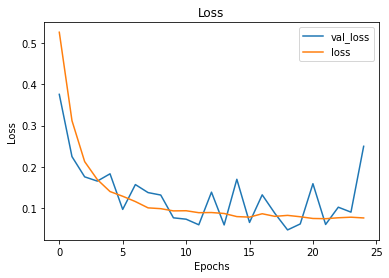

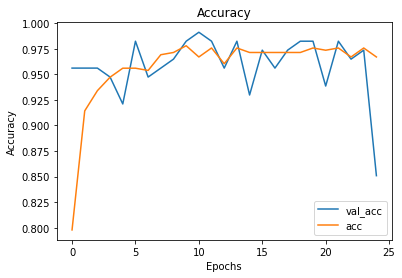

In [51]:
"""
neural networks converges much faste and gets better results

"""

plot_training_result(results_4)

In [52]:
"""
evalaute classificaiton
"""
y_hat_train = model_4.predict(scaled_df_m)

In [53]:
"""
neural networks give us probability, don't give us the class
"""
y_hat_train

array([[0.00245413],
       [0.00289291],
       [0.00246242],
       [0.00383618],
       [0.00308207],
       [0.01282504],
       [0.00280347],
       [0.01070228],
       [0.00416529],
       [0.00283691],
       [0.01176751],
       [0.00387818],
       [0.00412613],
       [0.02127698],
       [0.00502628],
       [0.00287655],
       [0.00485575],
       [0.00270197],
       [0.00230303],
       [0.6552151 ],
       [0.99124527],
       [0.9977393 ],
       [0.00497115],
       [0.00230363],
       [0.00236481],
       [0.00264958],
       [0.00305575],
       [0.00302082],
       [0.00257862],
       [0.01061478],
       [0.00240442],
       [0.00705275],
       [0.0025669 ],
       [0.00245377],
       [0.00339097],
       [0.0028916 ],
       [0.00716773],
       [0.996359  ],
       [0.5715435 ],
       [0.00858104],
       [0.4145004 ],
       [0.02082092],
       [0.00236985],
       [0.00971654],
       [0.01087901],
       [0.00256589],
       [0.99765635],
       [0.005

In [54]:
y_hat_train = model_4.predict(scaled_df_m).round()

In [55]:
#now w have 0 or 1
y_hat_train

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [56]:
"""


"""

'\n\n\n'